### Пономарева Алиса, БПМ-151, Вариант 23

## Лабораторная работа №6, ПРИБЛИЖЕНИЕ ФУНКЦИЙ

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

%matplotlib inline

### Задача 6.1

Функция  $y=f(x)$ задана таблицей значений $y_0, y_1,..., y_n$ в точках $x_0, x_1,..., x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+a_2x^2...+a_mx^m$ наилучшего  среднеквадратичного приближения оптимальной степени $m=m^{*}$. За оптимальное значение $m^{*}$ принять ту степень многочлена, начиная с которой величина $$\sigma_m=\sqrt{\frac{1}{n-m}\sum\limits_{k=0}^{n}(P_m(x_k)-y_k)^2}$$ стабилизируется или начинает возрастать. 

**1. Задать векторы x и y исходных данных.**

In [131]:
x = np.array([-0.5,-0.42,-0.33,-0.25,-0.17,-0.08,0,0.08,0.17,0.25,0.33,0.42,0.5])
y = np.array([0.061,4.185,7.271,9.683,11.319,11.469,11.324,10.495,9.659,7.345,5.132,2.619,0.069])
print(x)
print(y)

[-0.5  -0.42 -0.33 -0.25 -0.17 -0.08  0.    0.08  0.17  0.25  0.33  0.42
  0.5 ]
[ 0.061  4.185  7.271  9.683 11.319 11.469 11.324 10.495  9.659  7.345
  5.132  2.619  0.069]


**2.** Используя написанну функцию ***mnk***, найдём многочлены $P_m$, $m=0,1,2,...$ по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.


Функция mnk, строящая многочлен степени m по методу наименьших квадратов, 
возвращает вектор a коэффициентов многочлена:

$x, y$ $-$ векторы значений переменных и соответствующих им значений функции <br/>
$m$ $-$ степень искомого многочлена
<br/>
<br/>
$n$ $-$ размерность векторов $x, y$ <br/>
$b$ $-$ вектор правой части *нормальной системы*, которая используется в МНК для поиска вектора коэффициентов многочлена<br/>
$$b_j = \sum\limits_{i=0}^{n}y_i\cdot(x_i)^j$$
$\Gamma$ $-$ матрица *нормальной системы*
$$\Gamma_{j,\:k}=\sum\limits_{i=0}^{n}(x_i)^{k+j}$$
$$\Gamma a = b$$

In [132]:
def mnk(x, y, m):
    b = np.fromfunction(lambda j: np.sum([y[i]*x[i]**(j) for i in range(len(x))], axis=0), (m+1, ))
    Gamma = np.fromfunction(lambda j, k: np.sum([x[i]**(k+j) for i in range(len(x))], axis=0), (m+1, m+1))
    a = solve(Gamma, b)
    return a[::-1]

In [133]:
n = len(x)-1
sigma = np.zeros(n)
for m in range(n):
    P_m = np.poly1d(mnk(x, y, m))
    sigma[m] = np.sqrt((1/(n-m))*np.sum([(P_m(x[k])-y[k])**2 for k in range(len(x))]))

In [134]:
print(sigma)

[4.19109947 4.33370106 0.6630151  0.23853863 0.24727428 0.2638792
 0.27864254 0.30497183 0.18817228 0.21477712 0.22927542 0.29789436]


**3. Построить гистограмму зависимости $\sigma_m$ от $m$, на основании которой выбрать оптимальную степень $m^{*}$ многочлена наилучшего среднеквадратичного приближения.**

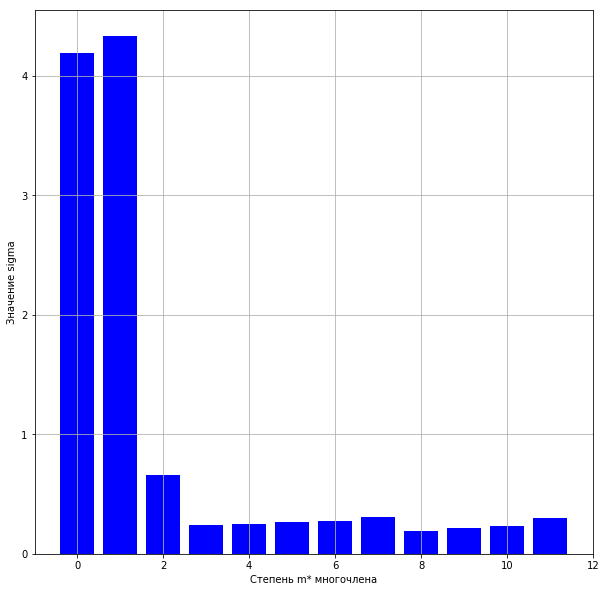

In [135]:
plt.figure(figsize=(10,10))
plt.bar(np.arange(n), sigma, color = 'blue')
plt.grid(True)
plt.xlabel('Степень m* многочлена')
plt.ylabel('Значение sigma')
plt.show()

In [136]:
P_best = np.poly1d(mnk(x, y, 8))
print(P_best)

       8      7        6         5         4         3         2
-8620 x + 93 x + 4325 x - 32.79 x - 662.2 x + 26.17 x - 14.68 x - 5.942 x + 11.22


Оптимальная степень многочлена = 8

**4. На одном чертеже построить графики многочленов $P_m$, $m=0,1,2,..., m^*$ и точечный график исходной функции. **

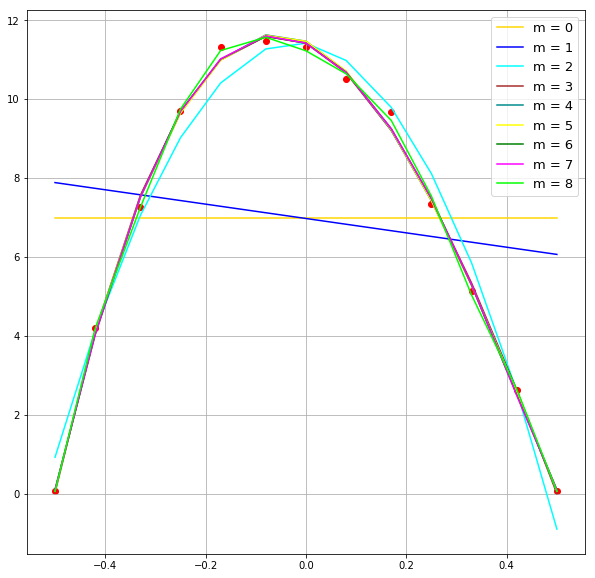

In [137]:
colors = ['gold','blue', 'aqua', 'brown', 'darkcyan', 'yellow','green','magenta', 'lime']
m_op = 8
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(x,y,c='red')
for m, color in zip(range(m_op+1), colors):
    P_m = np.poly1d(mnk(x,y,m))
    plt.plot(x, P_m(x), label=('m = '+str(m)), c=color)
    plt.legend(fontsize=13)

### Задача 6.2

В таблице приведены результаты наблюдений за перемещением $x$ $-$ материальной точки по оси $Ох$ в моменты времени $t\in[t_0,T]$. Известно, что движение является равномерным и описывается линейной зависимостью $x(t)=vt+b$. Используя  метод наименьших квадратов, определить скорость $v$ и спрогнозировать положение точки в момент времени $t=2T$. На одном рисунке построить график движения точки и точечный график исходных наблюдений. <br/>

|t|2      |  3.2  |  4.4  | 5 |   5.6   |  6.8 |  7.4  |  8  |  
|-|:-----:|:-----:|:-----:|:---:|:-----:|:----:|:-----:|:-----:|
|**x**| 18.50 | 35.73 | 54.65 |  62.4 | 71.74 | 90.5 | 98.10 | 107.6 | 

In [138]:
t = np.array([2, 3.2, 4.4, 5, 5.6, 6.8, 7.4, 8])
x = np.array([18.50, 35.73, 54.65, 62.4, 71.74, 90.5, 98.10, 107.6])

In [139]:
x_t = mnk(t, x, 1)
print('v = ', x_t[0])

v =  14.874801587301612


In [140]:
f = np.poly1d(x_t)
T = 8
print(f)
print('x(2T) = ', f(2*T))

 
14.87 x - 11.43
x(2T) =  226.56287698412726


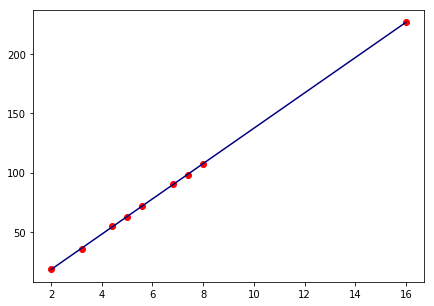

In [141]:
t = np.append(t, 2*t[-1])
x = np.append(x, f(t[-1]))


plt.figure(figsize=(7,5))
plt.scatter(t, x, c='red')
plt.plot(t, f(t), c='navy')

### Задача 6.3

Зависимость между величинами $x$ и $y$ описывается функцией   $y=f(x, a, b)$, где $a$ и $b$ $–$ неизвестные параметры. Найти  эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. <br/>
УКАЗАНИЕ <br/>
Свести исходную задачу к линейной задаче МНК можно, сделав подходящую замену переменных. Например, если исходная зависимость имеет вид $y = e^{a+bx^2}$, то, прологарифмировав исходное равенство и введя новые переменные $s=\ln{y}$ и $t=x^2$, получаем задачу об определении коэффициентов линейной зависимости $s=a+bt$.<br/>

$y = f(x,a,b)=a+b\ln{x}$

Замена: $t = \ln{x}$, получаем: $y = a +bt$

In [145]:
x3 = np.arange(0.1, 1.2, 0.1)
y3 = np.array([0.479, 0.7562, 0.9184, 1.0335, 1.1227, 1.1957, 1.2573, 1.3107, 1.3579, 1.4, 1.4381])

In [146]:
t = np.log(x3)
a = mnk(t, y3, 1)
f = np.poly1d(a)

print(a)
print(f)

[0.39999125 1.39998934]
 
0.4 x + 1.4
